# Полиноми у NumPy-у

Садржај:
1. [Полиноми као вектори коефицијената](#Полиноми-као-вектори-коефицијената)
    1. [Израчунавање вредности полинома](#Израчунавање-вредности-полинома)
    1. [Факторисани облик полинома](#Факторисани-облик-полинома)
1. [Алгебра полинома](#Алгебра-полинома)


In [1]:
import numpy as np
import matplotlib as mplb
import matplotlib.pyplot as plt
from timeit import default_timer as timer
import numpy.random as rndm

## Полиноми као вектори коефицијената

Рад са полиномима преко њихових вектора коефицијената један је од најбитнијих елемената примене матричног рачуна. Python је кроз NumPy библиотеку опремљен и функцијама специјализованим за такав начин рада са полиномима. Наиме, полином 
$$P_n(x)=p_0x^n+p_1x^{n-1}+\dots+p_{n-1}x+p_n$$ поистовећује се са вектором својих коефицијената $P_n(x)\equiv\begin{bmatrix}p_0&p_1&\dots&p_{n-1}&p_n\end{bmatrix}^T.$ Индексирање коефицијената полинома прилагођено је начину индексирања вектора у Python-у.
Тако је нпр. $P_4(x)=x^4+2\quad\Longrightarrow\quad P_4\equiv\begin{bmatrix}1&0&0&0&2\end{bmatrix}.$

Операције над векторима и матрицама могу да се прилагоде за рад са полиномима задатим преко вектора коефицијената.

### Израчунавање вредности полинома

**Пример 1.** Израчунаћемо матричним операцијама вредности полинома $P(x)=x^5+3x^4-2x^3-x^2+3x-2$ за $x\in\{-1,-0.5,1.3,2.2,3.4\}.$ У те сврхе можемо да искористимо Вандермондову матрицу. За израчунавање вредности полинома $$P(x)=p_0x^n+p_{1}x^{n-1}+\dots+p_{n-1}x+p_n=\displaystyle\sum_{k=0}^np_kx^{n-k}$$ за серију вредности аргумената $x\in\{a_0,a_1,\dots,a_m\}$ уз ознаку
Вандермондове матрице $V_{n+1}(a_0,a_1,\dots,a_m)=\begin{bmatrix}a_0^{n}&a_0^{n-1}&\dots&a_0&1\\
a_1^{n}&a_1^{n-1}&\dots&a_1&1\\
\vdots&\vdots&&\vdots&\vdots\\
a_m^{n}&a_m^{n-1}&\dots&a_m&1\end{bmatrix},$ имамо
$$\begin{bmatrix}P(a_0)\\P(a_1)\\\vdots\\P(a_{m-1})\\P(a_m)\end{bmatrix}=
\begin{bmatrix}a_0^{n}&a_0^{n-1}&\dots&a_0&1\\
a_1^{n}&a_1^{n-1}&\dots&a_1&1\\
\vdots&\vdots&&\vdots&\vdots\\
a_m^{n}&a_m^{n-1}&\dots&a_m&1\end{bmatrix}\begin{bmatrix}p_0\\p_1\\\vdots\\p_{n-1}\\p_n\end{bmatrix}.$$
Због тога уведимо променљиве којима ће ова израчунавања над полиномом $P(x)=x^5+3x^4-2x^3-x^2+3x-2$ бити извршена.

In [2]:
p=np.array([1,3,-2,-1,3,-2])  #predstavljanje polinoma vektorom koeficijenata
st=p.size
a=np.array([-1,-0.5,1.3,2.2,3.4]) #vrednosti argumenta u kojima se racuna vrednost polinoma
start = timer()
V5x6=np.vander(a,st)  #generisanje Vandermondove matrice
Pa=V5x6@p #izracunavanje vrednosti polinoma P u tackama a
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")
print(np.round(V5x6,2))
print(np.round(Pa,2))

Vreme izracunavanja:  0.00035310001112520695 sec
[[-1.0000e+00  1.0000e+00 -1.0000e+00  1.0000e+00 -1.0000e+00  1.0000e+00]
 [-3.0000e-02  6.0000e-02 -1.2000e-01  2.5000e-01 -5.0000e-01  1.0000e+00]
 [ 3.7100e+00  2.8600e+00  2.2000e+00  1.6900e+00  1.3000e+00  1.0000e+00]
 [ 5.1540e+01  2.3430e+01  1.0650e+01  4.8400e+00  2.2000e+00  1.0000e+00]
 [ 4.5435e+02  1.3363e+02  3.9300e+01  1.1560e+01  3.4000e+00  1.0000e+00]]
[ -2.    -3.34   8.1  100.28 773.29]


Овакав поступак дословно прати математичку формулу израчунавања. Ипак, он је и меморијски и операцијски неефикасан. Представаљање полинома преко вектора коефицијената погодује ефикасном поступку израчунавања вредности полинома путем Хорнерове шеме. Кључ је у специјалном начину записивања полинома који зовемо Хорнеров облик.
\begin{align}
P_n(x)&=p_0x^n+p_1x^{n-1}+\dots+p_{n-1}x+p_n\\
&=\big(\dots\big((p_0x+p_1)x\big)x+\dots+p_{n-1}\big)x+p_n.
\end{align}
Хорнерова шема се описује следећом таблицом:
$$\begin{array}{c|c|c|c|c|c}
a&p_0&p_1&\dots&p_{n-1}&p_n\\\hline
&+0&+aq_0&\dots&+aq_{n-2}&+aq_{n-1}\\\hline
&q_0&q_1&\dots&q_{n-1}&P(a)
\end{array}$$
Њен садржај можемо да тумачимо и у својству дељења полинома линеарним полиномом $x-a.$
$$P(x)=\big(q_0x^{n-1}+q_1x^{n-2}+\dots+q_{n-1}\big)(x-a)+P(a).$$

**Пример 2.** Израчунаћемо вредности полинома $P_5(x)=3x^5-2.1x^4+1.12x^3-3.74,$ за аргумент $x\in\{-1.3,-0.7,0.1,1.5,2.2,2.8,3.7\}$ по принципу Хорнерове шеме.

In [3]:
P5=np.array([3,-2.1,1.12,0,0,-3.74])

Реализоваћемо прво код за израчунавање вредности полинома за једну вредност аргумента, $a=2.2$ нпр. 

In [4]:
a=2.2
st=P5.size
#pocetak postupka Hornerove seme
P5a=P5[0]
start = timer()
for i in np.arange(1,st):
    P5a=P5a*a+P5[i]
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")
P5a    

Vreme izracunavanja:  8.779999916441739e-05 sec


113.60096000000003

Резултат можемо да проверимо "ручним израчунавањем"

In [5]:
start = timer()
rez=3*a**5-2.1*a**4+1.12*a**3-3.74
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")
rez

Vreme izracunavanja:  0.00013949999993201345 sec


113.60096000000003

или Вандермондовом матрицом.

In [6]:
V1x6=np.vander([a],st)  #generisanje Vandermondove matrice
print(V1x6)

[[51.53632 23.4256  10.648    4.84     2.2      1.     ]]


In [7]:
start = timer()
rez=V1x6@P5
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")
rez

Vreme izracunavanja:  0.00012740000966005027 sec


array([113.60096])

Сада можемо да прилагодимо претходни код за израчунавање вредности полинома за серију аргумената.

In [8]:
a=np.array([-1.3,-0.7,0.1,1.5,2.2,2.8,3.7])
n=a.size
start = timer()
P5a=P5[0]*np.ones(n)
for i in range(1,st):
    P5a=P5a*a+P5[i]
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")
P5a  

Vreme izracunavanja:  0.00017299999308306724 sec


array([ -23.33724,   -5.13258,   -3.73906,   12.19   ,  113.60096,
        408.07952, 1739.73626])

Резултат још једном можемо да проверимо "ручним израчунавањем".

In [9]:
start = timer()
rez=3*a**5-2.1*a**4+1.12*a**3-3.74
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")
rez

Vreme izracunavanja:  0.00024399999529123306 sec


array([ -23.33724,   -5.13258,   -3.73906,   12.19   ,  113.60096,
        408.07952, 1739.73626])

Уграђена NumPy функција која служи за израчунавање вредности полинома путем Хорнерове шеме је `polyval`.

In [10]:
start = timer()
rez=np.polyval(P5,a)
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")
rez

Vreme izracunavanja:  0.0001441000058548525 sec


array([ -23.33724,   -5.13258,   -3.73906,   12.19   ,  113.60096,
        408.07952, 1739.73626])

Упоредићемо сада времена израчунавања на полиному високог степена, за серију вредности аргумента. За креирање вектора коефицијената полинома и вектора аргумената користићемо генератор случајних бројева.

In [11]:
n=rndm.randint(200,351)  #stepen polinoma, ima n+1 koeficijenata 
p=rndm.uniform(-3.5,3.5,n+1)  #generisanje koeficijenata polinoma P
m=rndm.randint(22,151)   #broj argumenata
x=rndm.uniform(-2.5,2.5,m)
m , n

(52, 327)

In [12]:
Vmn=np.vander(x,n+1)  #generisanje Vandermondove matrice
Vmn.shape

(52, 328)

In [13]:
start = timer()
Vmn@p
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")

Vreme izracunavanja:  0.027026800002204254 sec


In [14]:
start = timer()
np.polyval(p,x)
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")

Vreme izracunavanja:  0.001527799991890788 sec


Добијена времена упоредићемо са временом потребним за множење матрице и вектора истих димензија.

In [15]:
A=rndm.uniform(-3,3,(m,n+1))
A.shape

(52, 328)

In [16]:
start = timer()
A@p
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")

Vreme izracunavanja:  0.00018999999156221747 sec


**Задатак 1.** Израчунавање вредности полинома са $2^n$ коефицијената, тј. степена ${\rm st}(P)=2^n-1,$ може временски брже да се изврши од Хорнерове шеме на основу векторизације израчунавања. Објаснићемо поступак на полиномима за мале вредности $n.$

$n=1,\quad 2^n=2$ коефицијента  $,\quad{\rm st}(P)=2^n-1=1.\qquad P(x)=p_0x+p_1$ 
\begin{align}
&p=\begin{bmatrix}p_0&p_1\end{bmatrix}\\
&P(x)=x*p[\ :\ :2]+p[1:\ :2]=x*p[0]+p[1]
\end{align}

$n=2,\quad 2^n=4$ коефицијента $,\quad{\rm st}(P)=2^n-1=3.\qquad P(x)=p_0x^3+p_1x^2+p_2x+p_3=x^2\big(p_0x+p_1\big)+p_2x+p_3$ 
\begin{align}
&p=\begin{bmatrix}p_0&p_1&p_2&p_3\end{bmatrix}\\
&p=x*p[\ :\ :2]+p[1:\ :2]=\begin{bmatrix}x*p[0]+p[1]&x*p[2]+p[3]\end{bmatrix}\\
&P(x)=x^2*p[\ :\ :2]+p[1:\ :2]=x^2\big(p[0]x+p[1]\big)+p[2]x+p[3]
\end{align}

$n=3,\quad 2^n=8$ коефицијената $,\quad{\rm st}(P)=2^n-1=7.$ 
\begin{align}
P(x)&=p_0x^7+p_1x^6+p_2x^5+p_3x^4+p_4x^3+p_5x^2+p_6x+p_7\\
&=x^4\big(p_0x^3+p_1x^2+p_2x+p_3\big)+p_4x^3+p_5x^2+p_6x+p_7
\end{align}
\begin{align}
&p=\begin{bmatrix}p_0&p_1&p_2&p_3&p_4&p_5&p_6&p_7\end{bmatrix}\\
&p=x*p[\ :\ :2]+p[1:\ :2]=\begin{bmatrix}p[0]x+p[1]&p[2]x+p[3]&p[4]x+p[5]&p[6]x+p[7]\end{bmatrix}\\
&p=x^2*p[\ :\ :2]+p[1:\ :2]=\begin{bmatrix}x^2\big(p[0]x+p[1]\big)+p[2]x+p[3]
&x^2\big(p[4]x+p[5]\big)+p[6]x+p[7]\end{bmatrix}\\
&P(x)=x^4*p[\ :\ :2]+p[1:\ :2]=x^4\Big(x^2\big(p[0]x+p[1]\big)+p[2]x+p[3]\Big)
+x^2\big(p[4]x+p[5]\big)+p[6]x+p[7]
\end{align}

У општем случају, полином са $2^n$ коефицијената израчунава се преко два полинома са $2^{n-1}$ коефицијената. 
$$P_{2^n-1}=x^{2^{n-1}}P_{2^{n-1}-1}+Q_{2^{n-1}-1}.$$
Затим се поступак уситњавања степена наставља за сваки од полинома са $P_{2^{n-1}-1}$ и $Q_{2^{n-1}-1}.$

Наредним кодом може да се провери разлика у временима извршења описаног алгоритма и одговарајуће уграђене NumPy функције `polyval`. 

In [17]:
#inicijalizacija problema
n=8  #stepen polinoma je 2^n-1
p=rndm.uniform(-3.5,3.5,2**n)  #generisanje koeficijenata polinoma P
x=rndm.rand()  #vrednost u kojoj se racuna P(x)

#Opisani algoritam:
pom=x
startn = timer()
a=pom*p[::2]+p[1::2]
for i in range(1,n):
    pom=pom**2
    a=pom*a[::2]+a[1::2]
endn = timer()
print("Vreme izvrsenja novog algoritma: ",endn - startn,"sec")


#Ugradjena NumPy funkcija:
start = timer()
P=np.polyval(p,x)
end = timer()
print("Vreme izvrsenja Hornerove seme: ",end - start,"sec")

Vreme izvrsenja novog algoritma:  0.0006900000007590279 sec
Vreme izvrsenja Hornerove seme:  0.0003823999868473038 sec


In [18]:
np.abs(a-P)  #razlika u izracunatim vrednostima polinoma

array([5.55111512e-17])

In [19]:
x

0.2805110752644685

Прилагодити горњи код новог алгоритма (са наставком векторизације) за израчунавања над вектором аргумената $x=\begin{bmatrix}x_0&x_1&\dots&x_m\end{bmatrix},$ тј. да може истовремено да рачуна низ вредности полинома $\begin{bmatrix}P_{2^n-1}(x_0)&P_{2^n-1}(x_1)&\dots&P_{2^n-1}(x_m)\end{bmatrix}.$ Вредности аргумената $x$ генерисати наредном кодном ћелијом. Упоредити времена извршења новог алгоритма и уграђене функције `polyval`. Одредити максималну разлику у добијеним вредностима полинома на два приказана начина.

За размишљање: због чега долази до разлике у израчунатим вредностима полинома. У те сврхе проверити за који опсег аргумента су велике разлике у добијеним вредностима полинома, а за који опсег су ове разлике занемарљиве.

In [20]:
m=165
x=np.linspace(-1.5,1.5,m)

In [21]:
starth = timer()
P=np.polyval(p,x)
endh = timer()
print("Vreme izvrsenja Hornerove seme: ",endh - starth,"sec")

Vreme izvrsenja Hornerove seme:  0.0005321999924490228 sec


In [22]:
(endh - starth)/(end - start)

1.3917364297963108

In [23]:
pom=x.copy()
a=np.outer(pom,p[::2])+p[1::2]
startn = timer()
for i in range(1,n):
    pom=pom**2
    a=(pom*(a.T[::2])).T+a[:,1::2]
endn = timer()
print("Vreme izvrsenja novog algoritma: ",endn - startn,"sec")

Vreme izvrsenja novog algoritma:  0.00032020000799093395 sec


In [24]:
a=a.reshape(m,)

Апсолутна разлика у вредностима.

In [25]:
np.max(np.abs(a-P))

9.50737950171172e+29

Релативна разлика у вредностима.

In [26]:
np.max(np.abs(a-P)/np.abs(a))

4.286607665575241e-14

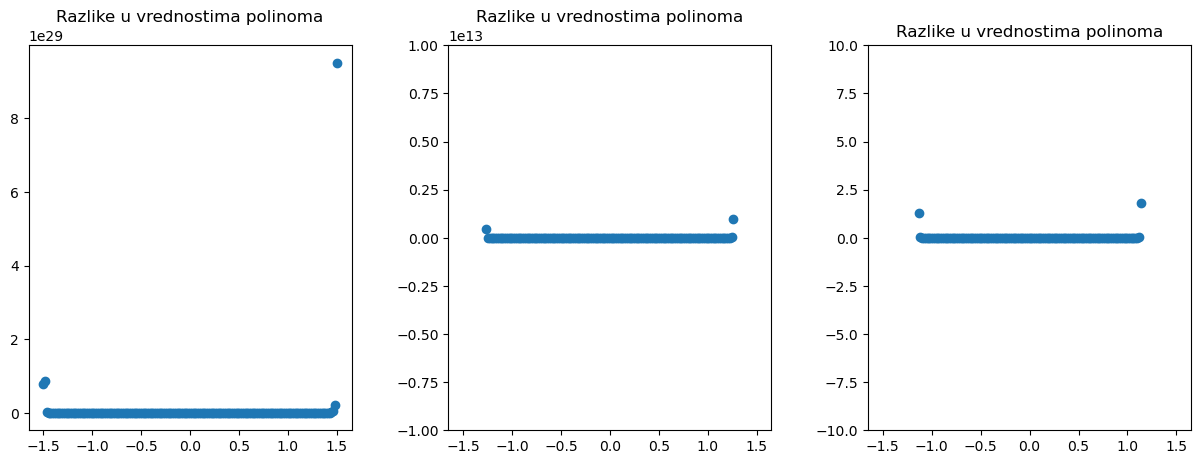

In [27]:
razl=np.abs(a-P)

slika = plt.figure(figsize=(15,5)) 
slika.subplots_adjust(hspace=0.6, wspace = 0.3)

plt.subplot(1,3,1)
plt.plot(x,razl,'o')
plt.title("Razlike u vrednostima polinoma");

plt.subplot(1,3,2)
plt.plot(x,razl,'o')
plt.ylim(-1e13,1e13)
plt.title("Razlike u vrednostima polinoma");

plt.subplot(1,3,3)
plt.plot(x,razl,'o')
plt.ylim(-1e1,1e1)
plt.title("Razlike u vrednostima polinoma");

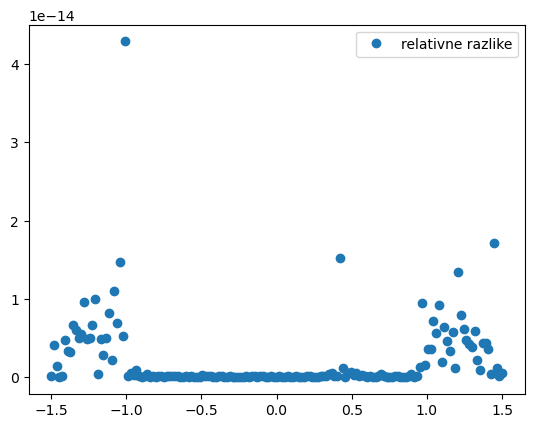

In [28]:
plt.plot(x,razl/np.abs(a),'o',label="relativne razlike")
plt.legend();

**Пример 3.** Израчунавање вредности полинома са $2^n$ коефицијената, тј. степена ${\rm st}(P)=2^n-1,$ може временски брже да се изврши од Хорнерове шеме на основу векторизације израчунавања. Објаснићемо поступак на полиномима за мале вредности $n.$

$n=1,\quad 2^n=2$ коефицијента  $,\quad{\rm st}(P)=2^n-1=1.\qquad P(x)=p_0x+p_1$ 
\begin{align}
&p=\begin{bmatrix}p_0&p_1\end{bmatrix}\\
&P(x)=x*p[0]+p[1]=x*p[\ :\ :2]+p[1:\ :2]
\end{align}

$n=2,\quad 2^n=4$ коефицијента $,\quad{\rm st}(P)=2^n-1=3.\qquad P(x)=p_0x^3+p_1x^2+p_2x+p_3=x^2\big(p_0x+p_1\big)+p_2x+p_3$ 
\begin{align}
&p=\begin{bmatrix}p_0&p_1&p_2&p_3\end{bmatrix}\\
&p=x*p[\ :\ :2]+p[1:\ :2]=\begin{bmatrix}x*p[0]+p[1]&x*p[2]+p[3]\end{bmatrix}\\
&P(x)=x^2*p[\ :\ :2]+p[1:\ :2]=x^2\big(p[0]x+p[1]\big)+p[2]x+p[3]
\end{align}

$n=3,\quad 2^n=8$ коефицијената $,\quad{\rm st}(P)=2^n-1=7.$ 
\begin{align}
P(x)&=p_0x^7+p_1x^6+p_2x^5+p_3x^4+p_4x^3+p_5x^2+p_6x+p_7\\
&=x^4\big(p_0x^3+p_1x^2+p_2x+p_3\big)+p_4x^3+p_5x^2+p_6x+p_7
\end{align}
\begin{align}
&p=\begin{bmatrix}p_0&p_1&p_2&p_3&p_4&p_5&p_6&p_7\end{bmatrix}\\
&p=x*p[\ :\ :2]+p[1:\ :2]=\begin{bmatrix}p[0]x+p[1]&p[2]x+p[3]&p[4]x+p[5]&p[6]x+p[7]\end{bmatrix}\\
&p=x^2*p[\ :\ :2]+p[1:\ :2]=\begin{bmatrix}x^2\big(p[0]x+p[1]\big)+p[2]x+p[3]
&x^2\big(p[4]x+p[5]\big)+p[6]x+p[7]\end{bmatrix}\\
&P(x)=x^4*p[\ :\ :2]+p[1:\ :2]=x^4\Big(x^2\big(p[0]x+p[1]\big)+p[2]x+p[3]\Big)
+x^2\big(p[4]x+p[5]\big)+p[6]x+p[7]
\end{align}

У општем случају, полином са $2^n$ коефицијената израчунава се преко два полинома са $2^{n-1}$ коефицијената. 
$$P_{2^n-1}=x^{2^{n-1}}P_{2^{n-1}-1}+Q_{2^{n-1}-1}.$$
Затим се поступак уситњавања степена наставља за сваки од полинома са $2^{n-1}$ коефицијената.

Наредним кодом може да се провери разлика у временима извршења описаног алгоритма и одговарајуће уграђене NumPy функције `polyval` за једну вредност аргумента $x.$ 

In [29]:
#inicijalizacija problema
n=8  #stepen polinoma je 2^n-1
p=rndm.uniform(-3.5,3.5,2**n)  #generisanje koeficijenata polinoma P
x=rndm.rand()  #vrednost u kojoj se racuna P(x)

#Opisani algoritam:
pom=x
startn = timer()
a=pom*p[::2]+p[1::2]
for i in range(1,n):
    pom=pom**2
    a=pom*a[::2]+a[1::2]
endn = timer()
print("Vreme izvrsenja novog algoritma: ",endn - startn,"sec")


#Ugradjena NumPy funkcija:
start = timer()
P=np.polyval(p,x)
end = timer()
print("Vreme izvrsenja Hornerove seme: ",end - start,"sec")

Vreme izvrsenja novog algoritma:  0.00017559999832883477 sec
Vreme izvrsenja Hornerove seme:  0.0004927999980282038 sec


In [30]:
np.abs(a-P)  #razlika u izracunatim vrednostima polinoma

array([3.33066907e-16])

In [31]:
x

0.5979764812817833

Прилагодићемо горњи код новог алгоритма (са наставком векторизације) за израчунавања над вектором аргумената $x=\begin{bmatrix}x_0&x_1&\dots&x_m\end{bmatrix},$ тј. да може истовремено да рачуна низ вредности полинома $\begin{bmatrix}P_{2^n-1}(x_0)&P_{2^n-1}(x_1)&\dots&P_{2^n-1}(x_m)\end{bmatrix}.$ Вредности аргумената $x$ су генерисане као вектор случајних вредности. Упоредићемо времена извршења новог алгоритма и уграђене функције `polyval`. Одредичемо максималну разлику у добијеним вредностима полинома на два алгоритма.

In [32]:
m=165   #broj vrednosti argumenta u kojima se izracunava polinom
x=np.linspace(-1.5,1.5,m)

In [33]:
starth = timer()
P=np.polyval(p,x)
endh = timer()
print("Vreme izvrsenja Hornerove seme: ",endh - starth,"sec")

Vreme izvrsenja Hornerove seme:  0.0006537000008393079 sec


In [34]:
(endh - starth)/(end - start)   #odnos vremena polyval funkcije za jedan  i m argumenata

1.3265016303873756

In [35]:
pom=x.copy()
a=np.outer(pom,p[::2])+p[1::2]
startn = timer()
for i in range(1,n):
    pom=pom**2
    a=(pom*(a.T[::2])).T+a[:,1::2]
endn = timer()
print("Vreme izvrsenja novog algoritma: ",endn - startn,"sec")

Vreme izvrsenja novog algoritma:  0.00021569999807979912 sec


In [36]:
a=a.reshape(m,)

Апсолутна разлика у вредностима.

In [37]:
np.max(np.abs(a-P))

1.1091942751997007e+30

Релативна разлика у вредностима.

In [38]:
np.max(np.abs(a-P)/np.abs(a))

1.7046857519846833e-14

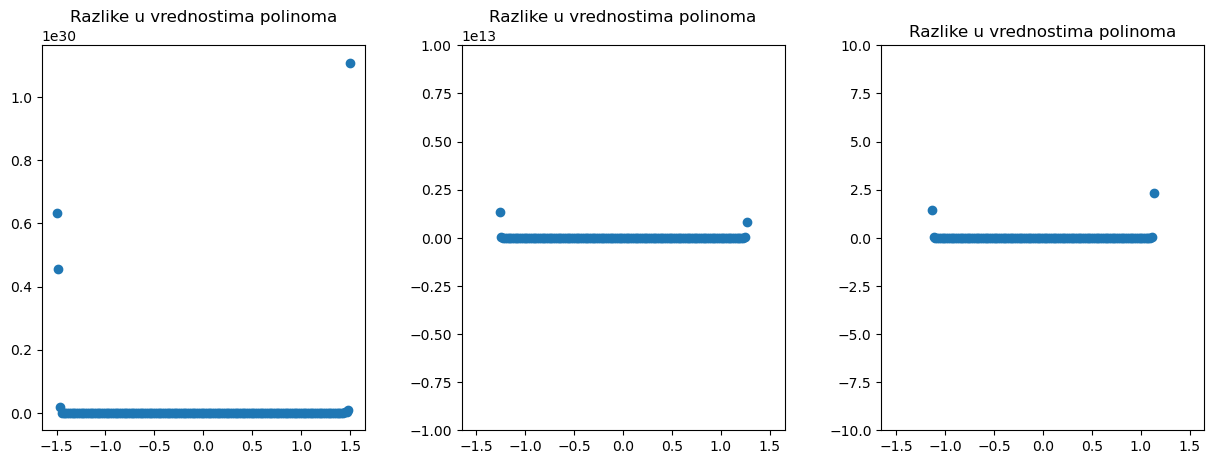

In [39]:
razl=np.abs(a-P)

slika = plt.figure(figsize=(15,5)) 
slika.subplots_adjust(hspace=0.6, wspace = 0.3)

plt.subplot(1,3,1)
plt.plot(x,razl,'o')
plt.title("Razlike u vrednostima polinoma");

plt.subplot(1,3,2)
plt.plot(x,razl,'o')
plt.ylim(-1e13,1e13)
plt.title("Razlike u vrednostima polinoma");

plt.subplot(1,3,3)
plt.plot(x,razl,'o')
plt.ylim(-1e1,1e1)
plt.title("Razlike u vrednostima polinoma");

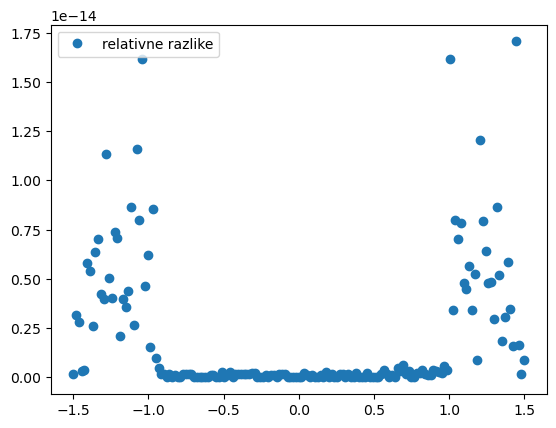

In [40]:
plt.plot(x,razl/np.abs(a),'o',label="relativne razlike")
plt.legend();

За размишљање: због чега долази до разлике у израчунатим вредностима полинома. У те сврхе проверити за који опсег аргумента су велике разлике у добијеним вредностима полинома, а за који опсег су ове разлике занемарљиве.

### Факторисани облик полинома

Познавање нула полинома, тј. његов факторисани облик
$$P_n(x)=p_0(x-z_0)(x-z_1)\dots(x-z_{n-1})$$
игра веома важну улогу у раду са полиномима. Задавање моничног полинома $M_n(x)=(x-z_0)(x-z_1)\dots(x-z_{n-1})$ преко вектора његових нула $\begin{bmatrix}z_0&z_1&\dots&z_{n-1}\end{bmatrix}$ омогућено је уграђеном NumPy функцијом `poly`. Функција враћа вектор коефицијената моничног полинома са задатим нулама, коефицијенти су поређани од најстаријег ка слободном члану.
```python
np.poly([z0,z1,...,z(n-1)])
```
$$M_n(x)=(x-z_0)(x-z_1)\dots(x-z_{n-1})=x^n+p_1x^{n-1}+\dots+p_{n-1}x+p_n\equiv\begin{bmatrix}1&p_1&\dots&p_{n-1}&p_n\end{bmatrix}^T$$

In [41]:
nule=np.array([-1.2,1,1,2.2j, 6.3, 3.1-2.3j])

In [42]:
np.poly(nule)

array([  1.     +0.j    , -10.2    +0.1j   ,  30.71   +6.11j  ,
       -37.19  -48.058j , -20.2036+25.8268j,  74.1372+67.5804j,
       -38.2536-51.5592j])

**Пример 3.** Потражићемо монични полином чије су све нуле (рачунајући и вишеструкости) $-1.2,\ 2.2i,\ 6.3,\ 3.1-2.3i.$

In [43]:
nule=np.array([-1.2,2.2j, 6.3, 3.1-2.3j])
P4=np.poly(nule)
P4

array([  1.     +0.j    ,  -8.2    +0.1j   ,  13.31   +6.31j  ,
        -2.37  -35.538j , -38.2536-51.5592j])

Излаз наредбе дао је вектор коефицијената траженог моничног полинома четвртог степена,
$$P_4(x)=x^4+(-8.2    +0.1i)x^3+(13.31   +6.31i)x^2+(-2.37  -35.538i)x -38.2536-51.5592i.$$
Проверићемо израчунавањем да ли је заиста полином $P_4(x)$ са траженим нулама. Један начин јесте примена уграђене функције `np.polyval`.

In [44]:
np.round(np.polyval(P4,nule),2)

array([-0.-0.j, -0.-0.j,  0.+0.j,  0.+0.j])

Други начин за проверу резултата јесу Вијетове формуле. 
\begin{align}
P_4(x)&=1\cdot x^4+p_1x^3+p_2x^2+p_3x+p_4=(x-z_0)(x-z_1)(x-z_2)(x-z_3),\\
&z_0+z_1+z_2+z_3=-p_1,\\
&z_0z_1+z_0z_2+z_0z_3+z_1z_2+z_1z_3+z_2z_3=p_2,\\
&z_0z_1z_2+z_0z_1z_3+z_0z_2z_3+z_1z_2z_3=-p_3,\\
&z_0z_1z_2z_3=p_4.
\end{align}
Њима можемо да утврдимо вредности коефицијената полинома $P_4.$

In [45]:
#provera koeficijenta p1
print(np.round(P4[1],2))
-np.round(np.sum(nule),2)

(-8.2+0.1j)


(-8.2+0.1j)

In [46]:
#provera koeficijenta p2
print(np.round(P4[2],2))
np.round(np.sum(nule[0]*nule[1:])+np.sum(nule[1]*nule[2:])+np.sum(nule[2]*nule[3:]),2)

(13.31+6.31j)


(13.31+6.31j)

In [47]:
#provera koeficijenta p3
print(np.round(P4[3],2))
np.round(-np.prod(nule[1:])-np.prod(nule[[0,2,3]])-np.prod(nule[[0,1,3]])-np.prod(nule[:3]),2)

(-2.37-35.54j)


(-2.37-35.54j)

In [48]:
#provera koeficijenta p4
print(np.round(P4[4],2))
np.round(np.prod(nule),2)

(-38.25-51.56j)


(-38.25-51.56j)

**Пример 4.** У раду са реалним полиномима можемо да користимо и графички приказ како бисмо проверили њихове карактеристике. Потражићемо монични полином $M_7(x)$ чије су све нуле (рачунајући и вишеструкости): $-1.2,\ -1.2,\ 2.2,\ 3.1,\ 3.1,\ 3.1,\ 6.3.$ Затим ћемо наћи полином $P_7(x)$ са истим нулама који још задовољава услов: 

а) $P_7(0)=2.35,\qquad$    б) $P_7(1)=3.12,\qquad$   в) $P_7(-1)=-3.64.$

In [49]:
nule=np.array([-1.2, -1.2, 2.2, 3.1, 3.1, 3.1, 6.3])
M7=np.poly(nule) #konstrukcija monicnog polinoma
#kreiranje podataka za grafik
x=np.linspace(-2,7,250)
M7x=np.polyval(M7,x)

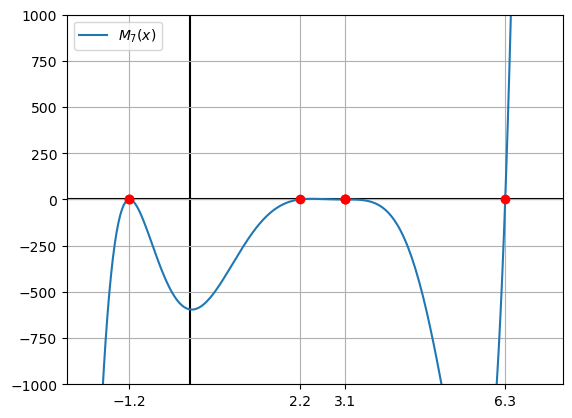

In [50]:
plt.plot(x,M7x,label='$M_7(x)$')
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.plot(nule,np.zeros(7),'or')
plt.xticks([-1.2, 2.2, 3.1, 6.3])
plt.ylim(-1000,1000)
plt.legend()
plt.grid();

На основу моничног полинома $M_7(x)$ креираћемо тражене полиноме $P_7(x)=p_0 M_7(x)$ мењањем вредности водећег коефицијента. Постављањем услова $P_7(a)=b$ налазимо одговарајући водећи коефицијент:
$$P_7(a)=b\quad\Longleftrightarrow\quad p_0 M_7(a)=b\quad\Longrightarrow\quad p_0=\dfrac{b}{M_7(a)}\,.$$
Сва три случаја (под а,б и в) можемо истовремено да решимо.

а) $P_7(0)=2.35,\qquad$    б) $P_7(1)=3.12,\qquad$   в) $P_7(-1)=-3.64.$

In [51]:
b=np.array([2.35, 3.12, -3.64])
a=np.array([0, 1, -1])
p0=b/np.polyval(M7,a)
p0  #vektor vodecih koeficijenata za svaki od polinoma pod a, b i v

array([-0.00395237, -0.01094446,  0.05652193])

Направићемо графички приказ добијених решења.

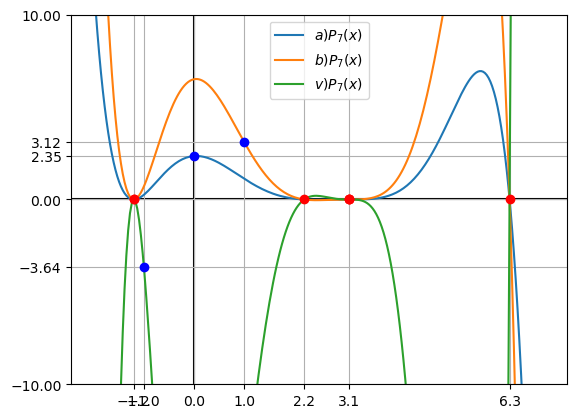

In [52]:
plt.plot(x,p0[0]*M7x,label='$a)P_7(x)$')
plt.plot(x,p0[1]*M7x,label='$b)P_7(x)$')
plt.plot(x,p0[2]*M7x,label='$v)P_7(x)$')
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.plot(nule,np.zeros(7),'or')
plt.plot(a,b,'ob')
plt.xticks([-1.2, -1, 0, 1, 2.2, 3.1, 6.3])
plt.yticks([-10, -3.64, 0, 2.35, 3.12, 10])
plt.ylim(-10,10)
plt.legend()
plt.grid();

## Алгебра полинома

Упознаћемо још неке уграђене функције за рад са полиномима преко њихових вектора коефицијената. Најпре, функције којима се обезбеђује основна алгебра полинома.

Функцијом `polyadd` добијамо коефицијенте збира два полинома. Синтакса наредбе је:
```python
polyadd(v ,u )
```

Функцијом `polysub` добијамо коефицијенте разлике два полинома. Синтакса наредбе је:
```python
polysub(v ,u )
```

Функцијом `polymul` добијамо коефицијенте производа два полинома. Синтакса наредбе је:
```python
polymul(v ,u )
```

Функцијом `polydiv` добија се количник и остатак Еуклидовог дељења два полинома. Синтакса наредбе је:
```python
polydiv(v ,u )
```
Излаз наредбе представљају два низа, први садржи коефицијенте полинома количника, а други коефицијенте полинома остатка.

**Пример 5.** Одредићемо збир, разлику, производ и количник (са остатком) два полинома из претходних примера $P_4$ и $P_5.$

In [53]:
print("P4(x)=",np.round(P4,2))
print("P5(x)=",P5)
np.round(np.polyadd(P4,P5),2)

P4(x)= [  1.   +0.j    -8.2  +0.1j   13.31 +6.31j  -2.37-35.54j -38.25-51.56j]
P5(x)= [ 3.   -2.1   1.12  0.    0.   -3.74]


array([  3.   +0.j  ,  -1.1  +0.j  ,  -7.08 +0.1j ,  13.31 +6.31j,
        -2.37-35.54j, -41.99-51.56j])

In [54]:
np.round(np.polysub(P5,P4),2)

array([  3.   +0.j  ,  -3.1  +0.j  ,   9.32 -0.1j , -13.31 -6.31j,
         2.37+35.54j,  34.51+51.56j])

In [55]:
np.round(np.polymul(P5,P4),2)

array([  3.    +0.j  , -26.7   +0.3j ,  58.27 +18.72j, -44.24-119.75j,
       -94.88 -72.98j,  73.94 +68.47j, -12.18 -58.12j, -49.78 -23.6j ,
         8.86+132.91j, 143.07+192.83j])

In [56]:
np.polydiv(P5,P4)

(array([ 3. +0.j , 22.5-0.3j]),
 array([ 145.66     -23.64j   , -294.258    -31.368j  ,
         178.7472  +953.5716j ,  872.43376+1148.60592j]))

**Задатак 2.** Полиноме $P(x)=ix^2-x+2i$ и $Q(x)=(1+i)x+1-i$ приказати као векторе њихових коефицијената. Одредити коефицијенте полинома $P+Q,\ P-Q,\ PQ$ користећи одговарајуће операције NumPy библиотеке.

In [57]:
P=np.array([1j,-1,2j])
Q=np.array([1+1j,1-1j])
print(np.polyadd(P,Q))
print(np.polysub(P,Q))
print(np.polymul(P,Q))

[0.+1.j 0.+1.j 1.+1.j]
[ 0.+1.j -2.-1.j -1.+3.j]
[-1.+1.j  0.+0.j -3.+3.j  2.+2.j]


**Задатак 3.** Природни бројеви у декадном запису користе позициони систем, тј. вредност броја одређује се на основу вредности цифара и њихове позиције у запису броја, нпр.
$$12345=1\cdot10^4+2\cdot10^3+3\cdot10^2+4\cdot10^1+5\cdot10^0.$$
Уколико уведемо ознаку $P(x)=1\cdot x^4+2\cdot x^3+3\cdot x^2+4\cdot x^1+5\cdot x^0$ видимо да вредност $12345$ је и вредност $P(10).$ На тај начин операције над полиномима постају средство за опис операција над бројевима са пуно цифара.

Генерисати два случајна броја $br1,br2$ као векторе њихових цифара дужина $n_1,n_2\in[111,222].$
Поставити да је $br1$ већи од $br2.$

In [58]:
n1, n2=rndm.randint(111,222,2)

print(n1)
print(n2)

164
181


In [59]:
if n1<n2:
    n1, n2=n2, n1# dve vrednosti n1 i n2 najverovatnije da nece bit izabrane jednake
br1=np.append(rndm.randint(1,9,1),rndm.randint(0,9,n1-1)) #veci broj
br2=np.append(rndm.randint(1,9,1),rndm.randint(0,9,n2-1)) #manji broj

print(br1)
print(br2)

[5 5 4 8 1 3 0 1 7 8 6 0 6 1 4 3 0 0 5 6 0 1 3 0 4 7 5 2 8 4 8 6 8 6 7 2 4
 2 0 4 8 5 2 3 6 0 4 4 4 1 1 1 4 8 1 4 2 6 6 3 5 8 0 0 7 0 6 7 1 6 3 8 6 0
 1 2 3 7 8 5 5 7 1 3 8 3 3 8 1 8 5 3 5 4 5 3 8 3 4 8 8 7 0 3 5 8 3 4 0 3 7
 1 7 5 5 2 3 4 0 1 6 1 3 1 8 3 0 7 7 1 1 1 8 5 3 3 1 5 2 4 6 6 4 0 2 1 7 7
 1 4 3 2 6 1 2 6 2 3 1 1 2 7 2 6 3 7 4 5 7 8 1 6 1 3 1 5 5 4 2 0 8]
[1 7 2 0 6 8 1 5 8 2 5 8 7 1 7 6 1 6 3 4 5 6 6 8 5 8 5 7 4 5 0 1 6 4 5 7 4
 2 0 7 5 6 4 8 4 5 7 2 0 7 0 7 1 7 0 5 5 2 0 8 8 6 0 7 0 0 1 6 4 2 7 3 4 6
 1 4 4 6 7 4 8 2 5 8 3 5 8 6 8 6 5 4 4 6 4 4 4 5 5 5 8 5 6 5 2 6 7 6 8 8 2
 0 5 3 8 0 1 6 2 5 6 7 8 2 4 4 5 8 7 1 6 0 2 6 3 4 5 7 0 7 0 6 3 6 3 7 6 4
 2 1 8 6 1 1 0 0 1 2 7 3 1 4 5 2]


Користећи операције NumPy за рад са полиномима и друге функције Python-a направити код за израчунавање:

а)   збира ова два броја (водити рачуна о преносу)

Приказаћемо прво секвенцијалну варијанту овог алгоритма ради поређења времена извршења са наредним кодом.

In [60]:
zbirs=np.polyadd(br1,br2)
zbirs

array([ 5,  5,  4,  8,  1,  3,  0,  1,  7,  8,  6,  0,  6,  1,  4,  3,  0,
        1, 12,  8,  0,  7, 11,  1,  9, 15,  7,  7, 16, 11,  9, 13, 14,  7,
       13,  5,  8,  7,  6, 10, 16, 10, 10,  8, 13,  4,  9,  4,  5,  7,  5,
        6, 11, 12,  3,  4,  9, 11, 12,  7, 13, 12,  5,  7,  9,  0, 13,  7,
        8,  7, 10,  8, 11,  5,  3,  2, 11, 15, 14,  5, 12,  7,  1,  4, 14,
        7,  5, 15,  4, 12, 11,  4,  9,  8, 11, 10, 12, 11,  6, 13, 16, 10,
        5, 11, 11, 16,  9,  9,  4,  7, 13,  5, 11,  9, 10,  7,  8, 12,  5,
        7, 11,  3,  9,  8, 14, 11,  8,  9,  7,  6,  4,  9,  8,  6,  9,  5,
        6, 11,  9, 12,  8, 10,  8,  5, 10,  8,  8, 13,  1,  6,  9,  5, 10,
        6,  9,  6,  9,  3,  7,  4,  8, 10,  9, 12,  7,  9,  5, 13, 13,  9,
        2,  6,  1,  4,  3, 12,  8,  5,  6,  5, 10])

In [61]:
start = timer()
for i in range(n1-1,1,-1):
    if zbirs[i]>9:
        zbirs[i-1]+=zbirs[i]//10
        zbirs[i]=zbirs[i]%10
if zbirs[0]>9:    
    zbirs=np.append([zbirs[0]//10,zbirs[0]%10],zbirs[1:])    
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")    
print(zbirs) 

Vreme izracunavanja:  0.001468399990699254 sec
[5 5 4 8 1 3 0 1 7 8 6 0 6 1 4 3 0 2 2 8 0 8 1 2 0 5 7 8 7 2 0 4 4 8 3 5 8
 7 7 1 7 1 0 9 3 4 9 4 5 7 5 7 2 2 3 5 0 2 2 8 4 2 5 7 9 1 3 7 8 8 0 9 1 5
 3 3 2 6 4 6 2 7 1 5 4 7 6 5 5 3 1 4 9 9 2 1 3 1 7 4 7 0 6 2 2 6 9 9 4 8 3
 6 2 0 0 7 9 2 5 8 1 3 9 9 5 1 8 9 7 6 4 9 8 6 9 5 7 2 0 2 9 0 8 6 0 8 9 3
 1 6 9 6 0 6 9 6 9 3 7 4 9 1 0 2 7 9 6 4 3 9 2 6 1 4 4 2 8 5 6 6 0]


Друга варијанта алгоритма користи паралелизацију израчунавања. Сви преноси се у једном кораку обављају. Поступак се понавља докле год има преноса.

In [62]:
zbir=np.polyadd(br1,br2)
#print(zbir)
start = timer()
q=(zbir[1:]>9)
while np.any(q):
    zbir[1:][q]=zbir[1:][q]%10
    zbir[0:-1][q]+=1
    q=(zbir[1:]>9)
if zbir[0]>9:    
    zbir=np.append([zbir[0]//10,zbir[0]%10],zbir[1:])
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")    
print(zbir)  

Vreme izracunavanja:  0.0008543999865651131 sec
[5 5 4 8 1 3 0 1 7 8 6 0 6 1 4 3 0 2 2 8 0 8 1 2 0 5 7 8 7 2 0 4 4 8 3 5 8
 7 7 1 7 1 0 9 3 4 9 4 5 7 5 7 2 2 3 5 0 2 2 8 4 2 5 7 9 1 3 7 8 8 0 9 1 5
 3 3 2 6 4 6 2 7 1 5 4 7 6 5 5 3 1 4 9 9 2 1 3 1 7 4 7 0 6 2 2 6 9 9 4 8 3
 6 2 0 0 7 9 2 5 8 1 3 9 9 5 1 8 9 7 6 4 9 8 6 9 5 7 2 0 2 9 0 8 6 0 8 9 3
 1 6 9 6 0 6 9 6 9 3 7 4 9 1 0 2 7 9 6 4 3 9 2 6 1 4 4 2 8 5 6 6 0]


In [63]:
np.any(zbir-zbirs)

False

б)   разлику ова два броја (већи-мањи)

За израчунавање разлике можемо да искористимо паралелизацију израчунавања на исти начин као малопре.

In [64]:
razlika=np.polysub(br1,br2)
#print(razlika)
start = timer()
q=(razlika[1:]<0)
while np.any(q):
    razlika[1:][q]=10+razlika[1:][q]
    razlika[0:-1][q]-=1
    q=(razlika[1:]<0)
if razlika[0]==0:    
    razlika=razlika[1:]
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")    
print(razlika)

Vreme izracunavanja:  0.000341199993272312 sec
[5 5 4 8 1 3 0 1 7 8 6 0 6 1 4 2 9 8 8 3 9 4 4 8 8 9 2 6 9 7 6 9 2 5 0 8 9
 6 3 7 9 9 3 7 8 5 9 4 2 4 6 5 7 3 9 3 5 0 9 8 7 3 4 3 4 9 9 6 4 4 6 8 0 4
 9 1 4 9 2 4 8 7 1 2 1 9 1 0 8 3 9 2 0 9 8 6 3 5 2 3 0 3 4 4 8 9 6 8 5 9 0
 7 3 0 9 6 7 5 4 5 0 8 6 4 1 4 2 5 6 5 7 3 8 3 7 0 5 8 4 6 4 1 9 4 3 4 6 1
 1 1 6 9 1 5 5 5 5 2 4 7 6 3 4 9 9 5 2 7 1 7 0 6 1 1 8 8 2 2 7 5 6]


Секвенцијална варијанта овог алгоритма дата је у настваку ради поређења времена извршења.

In [65]:
razlikas=np.polysub(br1,br2)
start = timer()
for i in range(n1-1,1,-1):
    if razlikas[i]<0:
        razlikas[i-1]-=1
        razlikas[i]+=10
if razlikas[0]==0:    
    razlikas=razlikas[1:]    
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")    
print(razlikas) 

Vreme izracunavanja:  0.00021660000493284315 sec
[5 5 4 8 1 3 0 1 7 8 6 0 6 1 4 2 9 8 8 3 9 4 4 8 8 9 2 6 9 7 6 9 2 5 0 8 9
 6 3 7 9 9 3 7 8 5 9 4 2 4 6 5 7 3 9 3 5 0 9 8 7 3 4 3 4 9 9 6 4 4 6 8 0 4
 9 1 4 9 2 4 8 7 1 2 1 9 1 0 8 3 9 2 0 9 8 6 3 5 2 3 0 3 4 4 8 9 6 8 5 9 0
 7 3 0 9 6 7 5 4 5 0 8 6 4 1 4 2 5 6 5 7 3 8 3 7 0 5 8 4 6 4 1 9 4 3 4 6 1
 1 1 6 9 1 5 5 5 5 2 4 7 6 3 4 9 9 5 2 7 1 7 0 6 1 1 8 8 2 2 7 5 6]


In [66]:
np.any(razlika-razlikas)

False

в)   производ ова два броја

In [67]:
proizvod=np.polymul(br1,br2)
#print(proizvod)
#print(proizvod.shape)
start = timer()
q=(proizvod[1:]>9)
while np.any(q):
    prenos=proizvod[1:][q]//10
    proizvod[1:][q]=proizvod[1:][q]%10
    proizvod[0:-1][q]+=prenos
    q=(proizvod[1:]>9)   
while proizvod[0]>9:    
    proizvod=np.append([proizvod[0]//10,proizvod[0]%10],proizvod[1:])
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")     
print(proizvod)
#print(proizvod.shape)

Vreme izracunavanja:  0.0009157000022241846 sec
[9 5 4 6 5 6 5 4 1 6 1 2 3 6 9 0 4 9 4 4 2 8 5 0 0 2 4 9 5 1 5 9 4 0 0 5 5
 2 7 6 5 2 0 9 6 7 7 8 6 3 0 2 6 4 9 1 9 4 2 8 9 9 3 6 3 3 0 6 8 4 3 1 2 8
 2 9 0 3 5 1 5 3 9 2 7 9 3 9 6 7 6 4 7 2 4 9 4 7 7 9 5 5 4 2 1 3 9 7 7 0 5
 2 6 7 6 2 7 9 5 5 3 6 1 8 8 8 9 9 5 6 2 8 2 0 4 2 7 9 3 4 0 6 1 3 1 1 7 0
 4 6 4 9 3 7 6 8 1 9 9 3 7 7 2 5 5 6 1 0 2 4 6 8 2 7 8 1 4 7 3 9 9 4 1 3 8
 4 4 0 0 3 7 9 6 4 6 6 7 7 0 9 5 9 3 5 6 8 3 5 7 0 2 1 1 4 3 2 7 8 0 9 6 6
 0 2 2 3 4 4 6 2 6 7 2 4 0 5 0 7 7 6 2 4 0 3 9 8 3 5 4 8 0 0 0 7 9 6 2 7 7
 9 7 7 9 2 0 8 1 1 8 2 4 7 3 1 0 1 4 8 3 2 5 2 9 0 6 8 2 1 4 9 1 8 1 6 2 9
 7 6 7 0 3 2 4 0 5 9 2 9 3 4 3 7 4 6 7 9 9 3 7 8 3 9 5 2 4 8 6 7 7 7 5 4 5
 8 8 0 8 4 5 5 0 0 1 6]


Секвенцијална варијанта овог алгоритма дата је у настваку ради поређења времена извршења.

In [68]:
proizvods=np.polymul(br1,br2)
starts = timer()
n=proizvods.size
for i in range(n-1,0,-1):
    if proizvods[i]>9:
        proizvods[i-1]+=proizvods[i]//10
        proizvods[i]=proizvods[i]%10
while proizvods[0]>9:    
    proizvods=np.append([proizvods[0]//10,proizvods[0]%10],proizvods[1:])   
ends = timer()
print("Vreme izracunavanja: ",ends - starts,"sec")    
print(proizvods) 

Vreme izracunavanja:  0.000745700002880767 sec
[9 5 4 6 5 6 5 4 1 6 1 2 3 6 9 0 4 9 4 4 2 8 5 0 0 2 4 9 5 1 5 9 4 0 0 5 5
 2 7 6 5 2 0 9 6 7 7 8 6 3 0 2 6 4 9 1 9 4 2 8 9 9 3 6 3 3 0 6 8 4 3 1 2 8
 2 9 0 3 5 1 5 3 9 2 7 9 3 9 6 7 6 4 7 2 4 9 4 7 7 9 5 5 4 2 1 3 9 7 7 0 5
 2 6 7 6 2 7 9 5 5 3 6 1 8 8 8 9 9 5 6 2 8 2 0 4 2 7 9 3 4 0 6 1 3 1 1 7 0
 4 6 4 9 3 7 6 8 1 9 9 3 7 7 2 5 5 6 1 0 2 4 6 8 2 7 8 1 4 7 3 9 9 4 1 3 8
 4 4 0 0 3 7 9 6 4 6 6 7 7 0 9 5 9 3 5 6 8 3 5 7 0 2 1 1 4 3 2 7 8 0 9 6 6
 0 2 2 3 4 4 6 2 6 7 2 4 0 5 0 7 7 6 2 4 0 3 9 8 3 5 4 8 0 0 0 7 9 6 2 7 7
 9 7 7 9 2 0 8 1 1 8 2 4 7 3 1 0 1 4 8 3 2 5 2 9 0 6 8 2 1 4 9 1 8 1 6 2 9
 7 6 7 0 3 2 4 0 5 9 2 9 3 4 3 7 4 6 7 9 9 3 7 8 3 9 5 2 4 8 6 7 7 7 5 4 5
 8 8 0 8 4 5 5 0 0 1 6]


In [69]:
np.any(proizvod-proizvods)

False

Осим претходних основних операција, полиноми подлежу и операцијама над функцијама као што су  изводи и интеграли. 
Уграђеном функцијом `polyder` добијамо коефицијенте извода полинома. Синтакса наредбе је:
```python
polyder(v [,r=1])
```
Уколико полином $P(x)=p_0x^n+p_{1}x^{n-1}+\dots+p_{n-1}x+p_n=\displaystyle\sum_{k=0}^np_kx^{n-k}$ представимо вектором његових коефицијената $P(x)\equiv\begin{bmatrix}p_0&p_1&\dots&p_{n-1}&p_n\end{bmatrix}^T,$ тада функција `polyder` враћа вектор коефицијената полинома $$P'(x)=np_0x^{n-1}+(n-1)p_{1}x^{n-2}+\dots+p_{n-1}=\displaystyle\sum_{k=0}^{n-1}(n-k)p_kx^{n-k-1}\equiv\begin{bmatrix}np_0&(n-1)p_1&\dots&p_{n-1}\end{bmatrix}^T.$$
Опционим аргументом `r` можемо да дефинишемо и ред извода већи од првог. Излаз ће бити вектор коефицијената одговарајућег изводног полинома.

Функцијом `polyint` добијамо коефицијенте примитивне функције полинома, који је наравно опет полином. Синтакса наредбе је:
```python
polyint(v [,r=1])
```

**Пример 6.** Одредићемо извод и примитивну функцију полинома $P_5(x)=3x^5-2.1x^4+1.12x^3-3.74$ из претходних примера. Приметимо да је
\begin{align}
&P_5'(x)=15x^4-8.4x^3+3.36x^2,\\
&\displaystyle\int_0^xP_5(t)dt=\displaystyle\int_0^x\left(3t^5-2.1t^4+1.12t^3-3.74\right)dt=\dfrac{3}{6}x^6-\dfrac{2.1}{5}x^5+\dfrac{1.12}{4}x^4-3.74x.
\end{align}

In [70]:
print("P5(x)=",P5)
np.polyder(P5)

P5(x)= [ 3.   -2.1   1.12  0.    0.   -3.74]


array([15.  , -8.4 ,  3.36,  0.  ,  0.  ])

In [71]:
np.polyint(P5)

array([ 0.5 , -0.42,  0.28,  0.  ,  0.  , -3.74,  0.  ])

**Пример 7.** Креираћемо Тејлоров полином степена $3$ функције $f(x)=\dfrac{x(x^2-1)}{x + 2}$  користећи информације о функцији и њеним изводима у тачки $x=0.5.$  

[Изводи](https://www.wolframalpha.com/input?i=Table%5BD%5B%28x%28x%5E2-1%29%29%2F%28x+%2B+2%29%5D%2C%7Bi%2C1%2C3%7D%5D%2F%2FSimplify) функције $f(x)$ до трећег реда гласе:
\begin{align}
&f(x)=\dfrac{x(x^2-1)}{x + 2}=\dfrac{x^3-x}{x + 2},\\
&f'(x)=\dfrac{2 (x^3 +3 x^2-1)}{(x+2)^2},\\
&f''(x)=\dfrac{2 (x^3 + 6 x^2 + 12 x+2)}{(x+2)^3},\\
&f'''(x)=\dfrac{36}{(x+2)^4}
\end{align}

In [72]:
c=0.5
fc=np.polyval([1,0,-1,0],c)/(c+2)
f1c=np.polyval([2,6,0,-2],c)/((c+2)**2)
f2c=np.polyval([2,12,24,4],c)/((c+2)**3)
f3c=36/((c+2)**4)
#kreiranje koeficijenata
T3=np.array([f3c/6,f2c/2,f1c,fc])

За графички приказ функције $f(x)$ полинома $T_3(x)$ креирамо низ њихових вредности на вектору $x.$

In [73]:
x=np.linspace(-1,2,100)
fx=(x*(x**2-1))/(x+2)

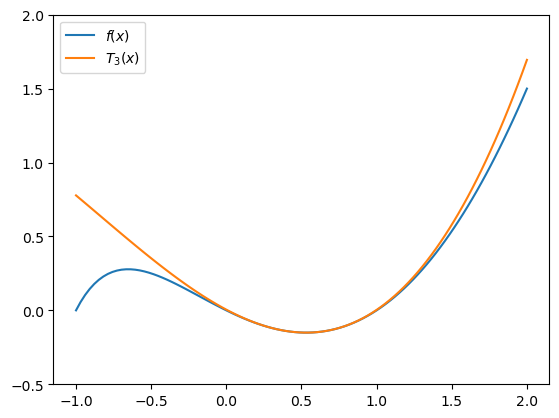

In [74]:
#izrachunavanje po principu Hornerove seme
T3x=np.polyval(T3,x-c)
plt.plot(x,fx,label=r'$f(x)$')
plt.plot(x,T3x,label=r'$T_3(x)$')
plt.ylim([-0.5,2])
plt.legend();    

**Пример 8.** Нека је дат полином $P(x)=p_0x^n+p_1x^{n-1}+\dots+p_{n-1}x+p_n$ у стандардном облику. За израчунавање вредности $P(a)$ можемо да користимо Хорнерову шему.
$$\begin{array}{c|c|c|c|c|c}
a&p_0&p_1&\dots&p_{n-1}&p_n\\\hline
&p_0&ap_0+p_1&\dots&\dots+p_{n-1}&P(a)\\\hline
&q_0&q_1&\dots&q_{n-1}&P(a)
\end{array}$$
Елементи табеле Хорнерове шеме користе се и као елементи резултата дељења два полинома, $P(x):(x-a).$ 
$$P(x)=Q(x)(x-a)+r=\big(q_0x^{n-1}+q_1x^{n-2}+\dots+q_{n-2}x+q_{n-1}\big)(x-a)+P(a).$$

Овај количник може да се искористи и за израчунавање вредности првог извода $P'(a):$
\begin{align}
P'(x)&=\Big(\big(q_0x^{n-1}+q_1x^{n-2}+\dots+q_{n-2}x+q_{n-1}\big)(x-a)+P(a)\Big)'\\
&=\Big(\big(q_0x^{n-1}+q_1x^{n-2}+\dots+q_{n-2}x+q_{n-1}\big)(x-a)\Big)'+\Big(+P(a)\Big)'\\
&=\Big(\big(q_0x^{n-1}+q_1x^{n-2}+\dots+q_{n-2}x+q_{n-1}\big)\Big)'(x-a)+\big(q_0x^{n-1}+q_1x^{n-2}+\dots+q_{n-2}x+q_{n-1}\big)\cdot(x-a)'\\
&=\Big(\big(q_0x^{n-1}+q_1x^{n-2}+\dots+q_{n-2}x+q_{n-1}\big)\Big)'(x-a)+\big(q_0x^{n-1}+q_1x^{n-2}+\dots+q_{n-2}x+q_{n-1}\big)\\
\Longrightarrow\quad P'(a)&=\Big(\big(q_0x^{n-1}+q_1x^{n-2}+\dots+q_{n-2}x+q_{n-1}\big)\Big)'\Big|_{x=a}(a-a)
+\big(q_0a^{n-1}+q_1a^{n-2}+\dots+q_{n-2}a+q_{n-1}\big)\\
&=q_0a^{n-1}+q_1a^{n-2}+\dots+q_{n-2}a+q_{n-1}=Q(a).
\end{align}

Због тога наставак претходне Хорнерове шеме у наредном реду даје вредност $P'(a)=Q(a).$
$$\begin{array}{c|c|c|c|c|c}
a&p_0&p_1&\dots&p_{n-2}&p_{n-1}&p_n\\\hline
&q_0&q_1&\dots&q_{n-2}&q_{n-1}&P(a)\\\hline
&s_0&s_1&\dots&s_{n-2}&P'(a)&
\end{array}$$
Како је други извод први извод првог извода, лако закључујемо да би наредни ред Хорнерове шеме произвео вредност $\dfrac{P''(a)}{2!},$ итд.

Заправо, из Математике 1 видели смо да вишеструком применом Хорнерове шеме добијамо израз полинома  по степенима $(x-a),$ што је заправо Тејлоров облик тог полинома.

На описани начин Хорнерова шема нам помаже у одређивању Тејлоровог облика полинома у околини тачке $x=a.$

За полином $P(x)=1.3x^6+2.7x^4-3.23x^3+0.15x^2-4.4x+1.3$ одредићемо Хорнеровом табелом Тејлоров облик овог полинома у околини тачке $a=-2.15,$ 
$$P(x)=\dfrac{P^{(6)}(a)}{6!}(x-a)^6+\dfrac{P^{(5)}(a)}{5!}(x-a)^5+\dots+\dfrac{P'(a)}{1!}(x-a)+P(a).$$
Хорнерова табела има облик
$$\begin{array}{c|c|c|c|c|c|c|c}
a&p_{00}&p_{01}&p_{02}&p_{03}&p_{04}&p_{05}&p_{06}\\\hline
&p_{10}&p_{11}&p_{12}&p_{13}&p_{14}&p_{15}&P(a)\\\hline
&p_{20}&p_{21}&p_{22}&p_{23}&p_{24}&P'(a)& \\\hline
&p_{30}&p_{31}&p_{32}&p_{33}&\dfrac{P''(a)}{2!}&&\\\hline
&p_{40}&p_{41}&p_{42}&\dfrac{P^{(3)}(a)}{3!}&&&\\\hline
&p_{50}&p_{51}&\dfrac{P^{(4)}(a)}{4!}&&&&\\\hline
&p_{50}&\dfrac{P^{(5)}(a)}{5!}&&&&&\\\hline
&\dfrac{P^{(6)}(a)}{6!}&&&&&&
\end{array}$$

Наредним кодом формираћемо ову Хорнерову табелу. Сви подаци биће смештени у један вектор који ће на крају поступка да садржи вредности тражених извода, почевши од најстаријег. Да бисмо спровели векторизацију израчунавања применићемо израчунавања у облику троугаоног алгоритма. Улаз у алгоритам представља вектор коефицијената полинома. 
$$P=\begin{bmatrix}p_{00}&p_{01}&p_{02}&p_{03}&p_{04}&p_{05}&p_{06}\end{bmatrix}$$

Кроз итерације врше се израчунавања следећих дијагоналних вредности:

-  $0.$ итерација: $p_{10}=p_{00}$
$$\begin{bmatrix}p_{00}&p_{01}&p_{02}&p_{03}&p_{04}&p_{05}&p_{06}\end{bmatrix}\mapsto\begin{bmatrix}p_{10}&p_{01}&p_{02}&p_{03}&p_{04}&p_{05}&p_{06}\end{bmatrix}$$

-  $1.$ итерација: $p_{11},p_{20}$
$$ p_{11}=a*p_{10}+p_{01},\qquad p_{20}=p_{10}$$
$$\begin{bmatrix}p_{10}&p_{01}&p_{02}&p_{03}&p_{04}&p_{05}&p_{06}\end{bmatrix}
\mapsto\begin{bmatrix}p_{20}&p_{11}&p_{02}&p_{03}&p_{04}&p_{05}&p_{06}\end{bmatrix}$$

-  $2.$ итерација: $p_{12},p_{21},p_{30}$
$$ p_{12}=a*p_{11}+p_{02},\qquad p_{21}=a*p_{20}+p_{11}, \qquad p_{30}=p_{20}$$
$$\begin{bmatrix}p_{20}&p_{11}&p_{02}&p_{03}&p_{04}&p_{05}&p_{06}\end{bmatrix}
\mapsto \begin{bmatrix}p_{30}&p_{21}&p_{12}&p_{03}&p_{04}&p_{05}&p_{06}\end{bmatrix}$$

-  $3.$ итерација: $p_{13},p_{22},p_{31},p_{40}$
$$ p_{13}=a*p_{12}+p_{03},\qquad p_{22}=a*p_{21}+p_{12}, \qquad p_{31}=a*p_{30}+p_{21},\qquad p_{40}=p_{30}$$
$$\begin{bmatrix}p_{30}&p_{21}&p_{12}&p_{03}&p_{04}&p_{05}&p_{06}\end{bmatrix}
\mapsto \begin{bmatrix}p_{40}&p_{31}&p_{22}&p_{13}&p_{04}&p_{05}&p_{06}\end{bmatrix}$$
-  итд. кроз 6 итерација добијамо све коефицијенте Тејлоровог развоја.

Приметимо да се вредности $p_{k0}$ не израчунавају већ само преносе.

In [77]:
Pol=np.array([1.3,0,2.7,-3.23,0.15,-4.4,1.3])
n=len(Pol)
a=-2.15
pij=Pol.copy()
start = timer()
for i in range(1,n+1):
    pij[1:i]=a*pij[:i-1]+pij[1:i]
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")
print(pij)

Vreme izracunavanja:  0.00017749999824445695 sec
[   1.3         -16.77         92.83875    -284.84775     512.53437187
 -515.50455481  229.64928006]


Дати троугаони алгоритам можемо да упоредимо по времену извршења са класичним секвенцијалним приступом.

In [78]:
pij=Pol.copy()
start = timer()
for j in range(n):
    for i in range(n-j-1):
        pij[i+1]=pij[i+1]+a*pij[i]
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")
print(pij)   

Vreme izracunavanja:  0.00016689999029040337 sec
[   1.3         -16.77         92.83875    -284.84775     512.53437187
 -515.50455481  229.64928006]


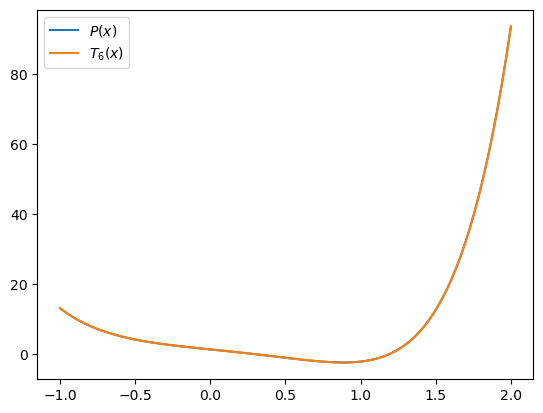

In [79]:
x=np.linspace(-1,2,100)
Px=np.polyval(Pol,x)
TPx=np.polyval(pij,x-a)
plt.plot(x,Px,label=r'$P(x)$')
plt.plot(x,TPx,label=r'$T_6(x)$')
plt.legend(); 

Осим тога, за изразе $P^{(i)}(a)$ можемо да користимо и уграђене функције за диференцирање и израчунавање вредности полинома.

In [80]:
pij=Pol.copy()
a=-2.15

In [81]:
koeficT=np.empty(n)
start = timer()
for i in range(n):
    koeficT[n-i-1]=np.polyval(pij,a)/np.math.factorial(i)
    pij=np.polyder(pij)
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")
print(koeficT )   

Vreme izracunavanja:  0.00043820000428240746 sec
[   1.3         -16.77         92.83875    -284.84775     512.53437187
 -515.50455481  229.64928006]


Једнакост полинома и његовог Тејлоровог развоја можемо да проверимо сређивањем израза Тејлоровог облика полинома или цртањем графика.

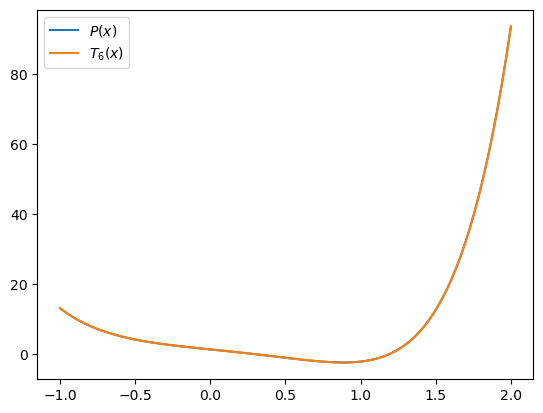

In [82]:
Px=np.polyval(Pol,x)
TPx=koeficT[0]
for i in range(1,7):
    TPx=TPx*(x-a)+koeficT[i]
plt.plot(x,Px,label=r'$P(x)$')
plt.plot(x,TPx,label=r'$T_6(x)$')
#plt.ylim([-0.2,0.4])
plt.legend();   

**Задатак 4.** а) Користећи `for` петљу напарвити код који рачуна вредност полинома на принципу Хорнерове шеме, са формирањем вектора свих међурезултата. Применити га за израчунавање вредности случајно генерисаног полинома $P_n(x),$ у $x=a$ где је $a$ такође случајно генерисана вредност (сами одлучите како). Генерисање полинома $P_n(x)$ подразумева случајно одређивање степена полинома $n\in[30,70]$ и одговарајућег вектора коефицијената од $n+1$ случајно изабраних реалних бројева, било које расподеле - сами се определите.

Којом уграђеном функцијом модула NumPy можете да проверите добијени резултат?

In [83]:
a=rndm.rand()
st=rndm.randint(30,70)
#pocetak postupka Hornerove seme
Pn=rndm.rand(st+1)
Pna=np.copy(Pn)
start = timer()
for i in np.arange(st):
    Pna[i+1]=Pna[i]*a+Pna[i+1]
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")
Pna  

Vreme izracunavanja:  0.00014390000433195382 sec


array([0.11211642, 0.8170889 , 0.88403838, 1.15575084, 1.47340046,
       1.14124055, 1.09592828, 0.59653409, 0.57712861, 1.06117141,
       0.69869252, 0.98076955, 0.96150951, 1.01587732, 0.79273223,
       0.34576349, 0.75059538, 0.91736163, 0.44025138, 0.38398353,
       0.60186049, 1.19467242, 0.83590324, 1.1891887 , 1.11553555,
       0.61374548, 0.77477374, 0.83644931, 1.09392837, 1.40594255,
       0.98469128, 0.74464404, 0.32870246, 0.59845691, 0.68675619,
       0.69896428, 0.98352488, 1.26702464, 1.15316904, 0.8151281 ,
       0.8994018 , 0.55338083, 0.26145944, 0.19837976, 0.20117719,
       0.49779736, 1.04734582, 0.96422855, 1.03534923, 0.62565975,
       0.84327653, 0.95844291, 0.77086721, 0.94529365, 0.88801006,
       0.71069426, 0.9122729 , 0.86981235, 0.93342809, 1.11051519,
       1.28313097, 0.93510675, 1.34605774, 1.17075093, 1.00149653,
       1.16867541, 1.43687327, 1.5563355 ])

In [84]:
start = timer()
vrednost=np.polyval(Pn,a)
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")
print(vrednost)

Vreme izracunavanja:  0.00031460000900551677 sec
1.5563355034298252


Све вредности у вектору резултата можемо да проверимо операцијом дељења полинома, тј. $P(x):(x-a)$ - наредба `polydiv`.

In [85]:
start = timer()
rez=np.polydiv(Pn,np.array([1,-a]))
end = timer()
print(rez)
print("Vreme izracunavanja: ",end - start,"sec")

(array([0.11211642, 0.8170889 , 0.88403838, 1.15575084, 1.47340046,
       1.14124055, 1.09592828, 0.59653409, 0.57712861, 1.06117141,
       0.69869252, 0.98076955, 0.96150951, 1.01587732, 0.79273223,
       0.34576349, 0.75059538, 0.91736163, 0.44025138, 0.38398353,
       0.60186049, 1.19467242, 0.83590324, 1.1891887 , 1.11553555,
       0.61374548, 0.77477374, 0.83644931, 1.09392837, 1.40594255,
       0.98469128, 0.74464404, 0.32870246, 0.59845691, 0.68675619,
       0.69896428, 0.98352488, 1.26702464, 1.15316904, 0.8151281 ,
       0.8994018 , 0.55338083, 0.26145944, 0.19837976, 0.20117719,
       0.49779736, 1.04734582, 0.96422855, 1.03534923, 0.62565975,
       0.84327653, 0.95844291, 0.77086721, 0.94529365, 0.88801006,
       0.71069426, 0.9122729 , 0.86981235, 0.93342809, 1.11051519,
       1.28313097, 0.93510675, 1.34605774, 1.17075093, 1.00149653,
       1.16867541, 1.43687327]), array([1.5563355]))
Vreme izracunavanja:  0.0038213000079849735 sec


б) Применити претходни код за Хорнерову шему за израчунавање $P'(1),$ за $$P(x)=x^5-3x^4+2.1x^3+0.4x^2-3.5x+2.7.$$ Затим одредити Тејлоров облик полинома $P(x)$ у околини $x=1.$ Користити векторизацију израчунавања за смањење времена извршења поступка.

In [86]:
Pn=np.array([1,-3,2.1,0.4,-3.5,2.7])
n=Pn.size
a=1
pij=Pn.copy()
start = timer()
for i in range(1,n+1):
    pij[1:i]=a*pij[:i-1]+pij[1:i]
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")
print(np.round(pij,2))

Vreme izracunavanja:  0.0001655000087339431 sec
[ 1.   2.   0.1 -1.3 -3.4 -0.3]


Резултат: 
- $P'(1)=-3.4$
- Тејлоров полином у околини $x=1$ гласи $T_5(x)=(x-1)^5+2(x-1)^4+0.1(x-1)^3-1.3(x-1)^2-3.4(x-1)-0.3.$

Провера резултата:

In [87]:
koeficT=np.empty(n)
pij=Pn.copy()
start = timer()
for i in range(n):
    koeficT[n-i-1]=np.polyval(pij,a)/np.math.factorial(i)
    pij=np.polyder(pij)
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")
print(koeficT )

Vreme izracunavanja:  0.0004970000009052455 sec
[ 1.   2.   0.1 -1.3 -3.4 -0.3]


***